In [1]:
#Importing Needed Libraries
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt


In [4]:
df=pandas.read_csv("/Salaries.csv") #Read the dataset


PART ONE: Basic Data Exploration

In [5]:
#Storing the number rows and columns in 'Salary' dataset
numOfRows,numOfColumns=df.shape
print("Number of rows in the dataset: ",numOfRows)
print("Number of columns in the dataset: ",numOfColumns)

#Storing names of each column in the dataset
col_names=df.columns.tolist()

#Printing the data type of each column
for i in col_names:
    print(i,": ",df[i].dtype)

#Checking for missing values in each column and then get the sum of each of them by using sum() function
null_values=df.isnull().sum()
print()
print("Missing values in each column: ")
for x,y in null_values.items():
    print(x,": ",y)

#The totale number of missing values in the entire dataset
print("Totale number of missing values")
df.isnull().sum().sum()



Number of rows in the dataset:  78778
Number of columns in the dataset:  13
Id :  int64
EmployeeName :  object
JobTitle :  object
BasePay :  float64
OvertimePay :  float64
OtherPay :  float64
Benefits :  float64
TotalPay :  float64
TotalPayBenefits :  float64
Year :  float64
Notes :  float64
Agency :  object
Status :  float64

Missing values in each column: 
Id :  0
EmployeeName :  0
JobTitle :  0
BasePay :  1
OvertimePay :  1
OtherPay :  1
Benefits :  36160
TotalPay :  1
TotalPayBenefits :  1
Year :  1
Notes :  78778
Agency :  1
Status :  78778
Totale number of missing values


193723

PART TWO:Descriptive Statistics

In [6]:
#Calculating Basic Statstics for the 'TotalPay' Atrribute which is the 'Salary'


#Mean
salary_mean=df['TotalPay'].mean()
print("The Avarge Salary is: ",salary_mean)

#Medain
salary_median=df['TotalPay'].median()
print("The Middle Salary value is: ",salary_median)

#Mode
salary_mode=df['TotalPay'].mode()
print("The Most Frequent Salary is: ",salary_mode)

#Minimum And Maximum Values of Salary
min_salary=df['TotalPay'].min()
max_salary=df['TotalPay'].max()
print("Minimum Value: ",min_salary)
print("Maximum value: ",max_salary)

#The Range of the Salaries
salary_range=max_salary-min_salary
print("Range of Salaries: ",salary_range)

#Standerd Divation of Salary Distribution
salary_std=df['TotalPay'].std()
print("Standerd Divation of Salaries: ",salary_std)


The Avarge Salary is:  79826.28374677889
The Middle Salary value is:  73377.33
The Most Frequent Salary is:  0    123290.7
Name: TotalPay, dtype: float64
Minimum Value:  0.0
Maximum value:  567595.43
Range of Salaries:  567595.43
Standerd Divation of Salaries:  53291.31678410497


PART THREE: Data Cleaning
One of the opreations of Data Cleaning is to handle the missing value
The Missing values will be handled by replacing them by the mean or medain values in an attribute in the dataset
if the distribution was Skewed -> the median will be used to replace the missing values
else-> if the distribution was Normally distributed then mean value will be used
if all data points in an attribute were null values the attribute will be dropped

WHY this Method for handling the missing values is used ??
 Median or Mean values specifies the avarge value in each atrribute;Then there is a big chance that the missing values be close to these two values

In [7]:



df2=df
for x,y in null_values.items(): #Iterating over the attributes and the missing value associated with each one
    if(y==0):      #no missing values->continue
        continue
    elif(y==numOfRows): #All data points in this attribute is = null -> drop the attribute
        df2.drop(x,axis=1,inplace=True)
    else:
        skeweness=df2[x].skew(numeric_only=True)   #Finding the skewness for each attribute

        if(skeweness==0):   #skewness =0 ->Normally Distributed
             df2=df2.fillna(value=df[x].mean())   #Replace missing values by the mean
        else:      #skewness !=0 -> Skewed Distributed
             df2=df2.fillna(value=df[x].median())  #Replace missing values by the median

df2.to_csv('Modifed.csv')
print("Missing values in each column after Data Cleaning: ")
df2.isnull().sum()



<ipython-input-7-9a110529043f>:8: FutureWarning: Calling Series.skew with numeric_only=True and dtype object will raise a TypeError in the future
  skeweness=df2[x].skew(numeric_only=True)   #Finding the skewness for each attribute


NotImplementedError: Series.skew does not implement numeric_only.

PART FOUR: Basic Data Visualization
NOTE: For finding The Pie Chart Visualization,There is No such Attribute indicating for "Department"
SO,SORRY

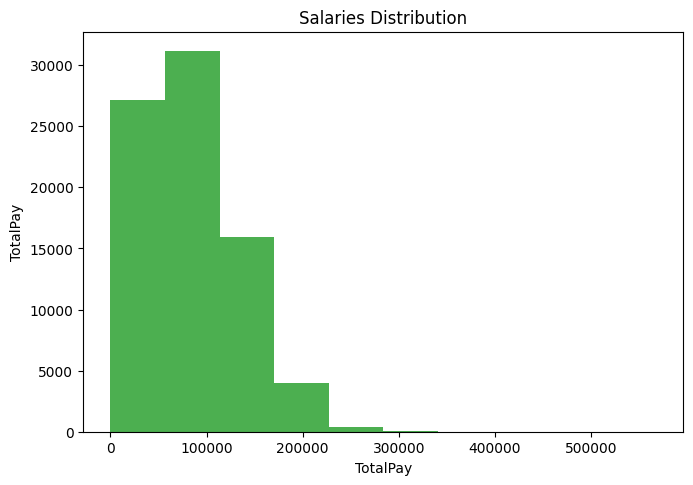

In [8]:
np_arr=df2.values
x_axis=np_arr[:,7]
fig_1=plt.figure(figsize=(6,4))
axes=fig_1.add_axes([0,0,1,1])
axes.set_xlabel("TotalPay")
axes.set_ylabel("TotalPay")
axes.set_title("Salaries Distribution")
plt.hist(x_axis,color="#4CAF50")
plt.show()


PART FIVE: Grouped Analysis
The data set will be grouped by the 'JobTitle' attribute, and for each attribute in a group a convenient summary statstics will be founded,
A mean for the TotalPay attribute is calculated, And compare the max mean salary and the min mean salary and
The following information is founded:
The Hieghst Mean Salary is the 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY' with 399211.275 avarage salary
The lowest Mean Salary is the 'IS Technician Assistant' with 0.0 avarage salary

In [9]:
grouped=df2.groupby(['JobTitle']) #Grouping the data by JobTitle
grouped_mean=grouped['TotalPay'].mean(numeric_only=True) #Finding the mean salary for each group
grouped_summary_stat=grouped.agg({'BasePay':['mean','median','min','max','count','std'],'OvertimePay':['mean','median','min','max','count','std']
                          ,'OtherPay':['mean','median','min','max','count','std'],'Benefits':['mean','median','min','max','count','std']
                          ,'TotalPay':['mean','median','min','max','count','std'],'TotalPayBenefits':['mean','median','min','max','count','std']
                          ,'Year':['min','max','count']})
#finding the summary statstics for each attribuete

sorted_grouped_mean=grouped_mean.sort_values() # sorting the gouped mean in an ascending order to find the min_mean_salary
min_mean_salary=[sorted_grouped_mean.index[0],sorted_grouped_mean[0]] #storing the min_mean_salary
rsorted_grouped_mean=grouped_mean.sort_values(ascending=False) #sorting the gouped mean in an deascending order to find the max_mean_salary
max_mean_salary=[rsorted_grouped_mean.index[0],rsorted_grouped_mean[0]] #storing the max_mean_salary

print("The Job Title With The Hieghst Avarage is ------>",max_mean_salary[0])
print("The Maximum Avarage Salary---------------------->",max_mean_salary[1])
print("The Job Title With The Lowest Avarage is ------->",min_mean_salary[0])
print("The Minimum Avarage Salary---------------------->",min_mean_salary[1])






The Job Title With The Hieghst Avarage is ------> GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
The Maximum Avarage Salary----------------------> 399211.275
The Job Title With The Lowest Avarage is -------> PUBLIC SAFETY COMMUNICATIONS TECHNICIAN
The Minimum Avarage Salary----------------------> 149.51


PART SIX: Simple Correlation Analysis
The Correlation will be calculated between:
1_Salary AND OvertimePay
2_Salary AND Benefits
Note that the value of the correlation indicates for the following:
1_if the correlation is greater than 0 then the two attributes are positively correlated,and the higher the value the stronger the correlation
2_if the correlation is equal to 0 then the two attributes are independent, which mean that they are NOT correlated
3_if the correlation is less than 0 then the two attributes are negatively correlated


The Correlation value between Salary And OvertimePay:  0.5131093777439404

positively correlated!!


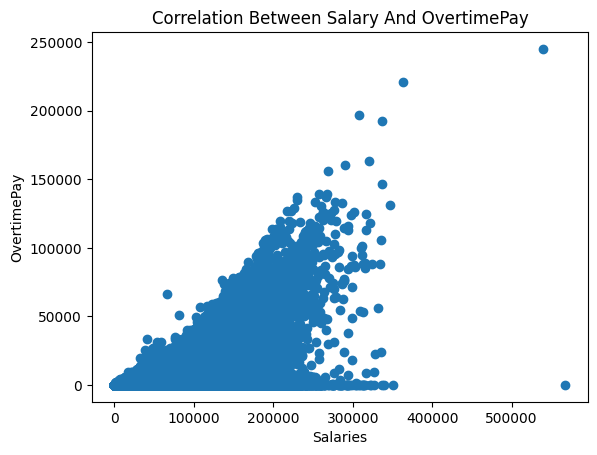

In [10]:
sal_overtime_corr=df2['TotalPay'].corr(df2['OvertimePay']) #Calculating The Correlation
print("The Correlation value between Salary And OvertimePay: ",sal_overtime_corr)
print()
#positively,negatively OR independent correlation
if(sal_overtime_corr>0):
    print("positively correlated!!")
elif(sal_overtime_corr<0):
    print("negatively correlated!!")
else:
    print("Independent Attributes")

#Plotting the realtionship between Salary And OvertimePay
plt.title("Correlation Between Salary And OvertimePay")
plt.xlabel("Salaries")
plt.ylabel("OvertimePay")
plt.scatter(x=df2['TotalPay'],y=df2['OvertimePay'])
plt.show()




PART SEVEN: Summary of Insights
1-The dataset consists of  (148654) Row and ( 13)columns, the datatype of the attributes is(int,float,object)
The total number of the missing values is (334088)
2-From the Descriptive Statstics that I made you can Notice that the Avarage Salary is (74768.321),
the Standerd Divation of the Salaries is (50517.0052), and the range value of the salary is (568213.56)
3-The Histogram Visualization indictes that the distribution of Salaries goes to be positively Skewed
4-The Resulit from grouping analysis is that:
The Hieghst Mean Salary is the 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY' with 399211.275 avarage salary
The lowest Mean Salary is the 'IS Technician Assistant' with 0.0 avarage salary
5-After the simple correlation Analysis we can notice that the Salary and OvertimePay are positively correlated;which means that the more the 'Salary' grows the more the 'OvertimePay' atrribute grows
